In [1]:
import pandas as pd

dia = pd.Timestamp('2020-07-18')
dia

Timestamp('2020-07-18 00:00:00')

In [47]:
import pandas as pd

from random import randint
dia = pd.Timestamp('2020-07-21 00:00:00')
dia.day_name()

'Tuesday'

In [3]:
import pandas as pd

from random import randint
dia = pd.Timestamp('2020-01-01 00:00:00')
leng = 60*24*30

work_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
work_hours = [8,9,10,11,14,15,16,17]

timestamp = [dia + pd.Timedelta(f'{min} minute') for min in range(0,leng)]
cpu = [randint(5*time.hour-10,5*time.hour+10) if (time.day_name() in work_days and time.hour in work_hours) else randint(10,30) for time in timestamp]
ram = [randint(4*time.hour-10,5*time.hour) if (time.day_name() in work_days and time.hour in work_hours) else randint(10,30) for time in timestamp]
#timestamp = [str(time) for time in timestamp]

df = pd.DataFrame({'timestamp':timestamp, 'cpu':cpu, 'ram':ram})
df.to_csv('hosts_status.csv', index=False)
df.head()

,timestamp,cpu,ram
0,2020-01-01 00:00:00,15,16
1,2020-01-01 00:01:00,25,20
2,2020-01-01 00:02:00,20,24
3,2020-01-01 00:03:00,22,26
4,2020-01-01 00:04:00,22,24


In [4]:
df = pd.read_csv('hosts_status.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43200 entries, 2020-01-01 00:00:00 to 2020-01-30 23:59:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cpu     43200 non-null  int64
 1   ram     43200 non-null  int64
dtypes: int64(2)
memory usage: 1012.5 KB


## Plotando uma Série

<AxesSubplot:xlabel='timestamp'>

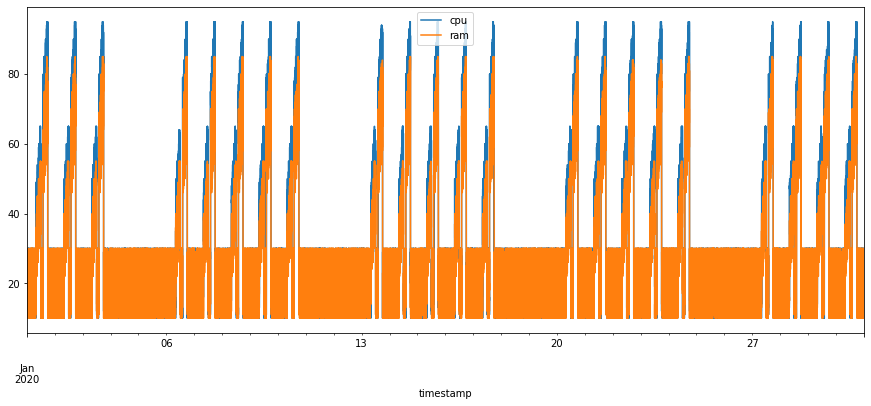

In [5]:
df.plot(figsize=(15,6))

## Análise de um Série

<AxesSubplot:xlabel='timestamp'>

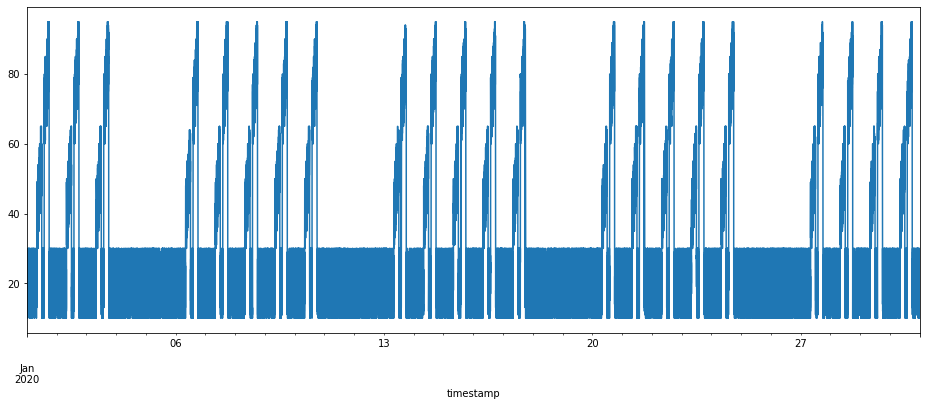

In [6]:
df.cpu.plot(figsize=(16,6))

## Aplicando Médias Móveis

<AxesSubplot:xlabel='timestamp'>

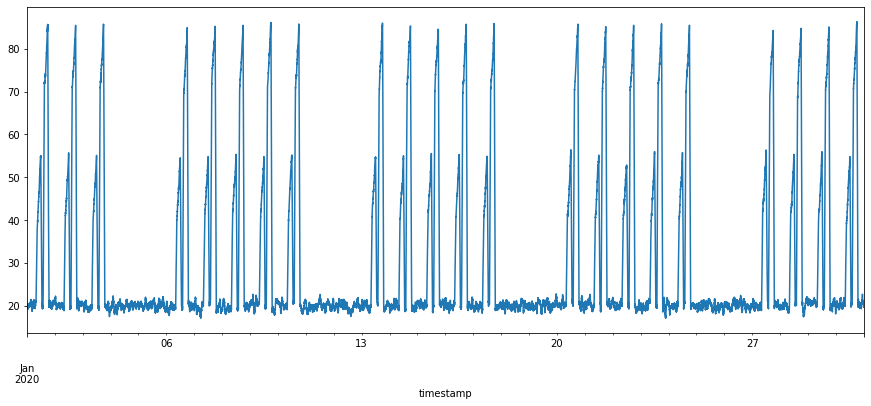

In [7]:
df.cpu.rolling(60).mean().plot(figsize=(15,6))

## Agrupando por Dia da Semana

<AxesSubplot:xlabel='timestamp'>

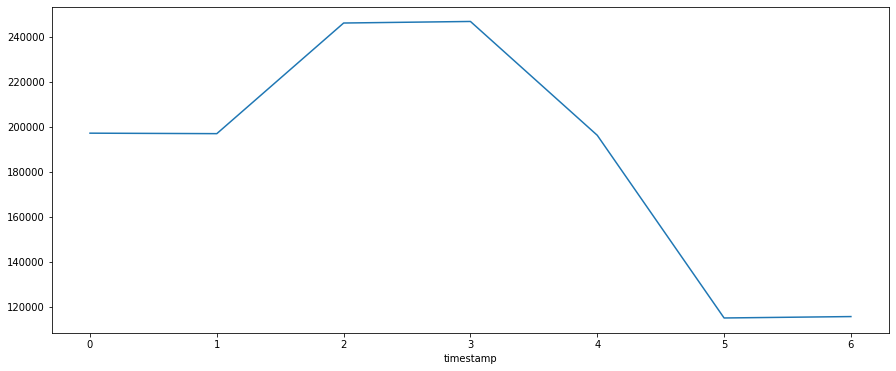

In [8]:
df.cpu.groupby(df.index.dayofweek).sum().plot(figsize=(15,6))

## Agrupando por Hora

<AxesSubplot:xlabel='timestamp'>

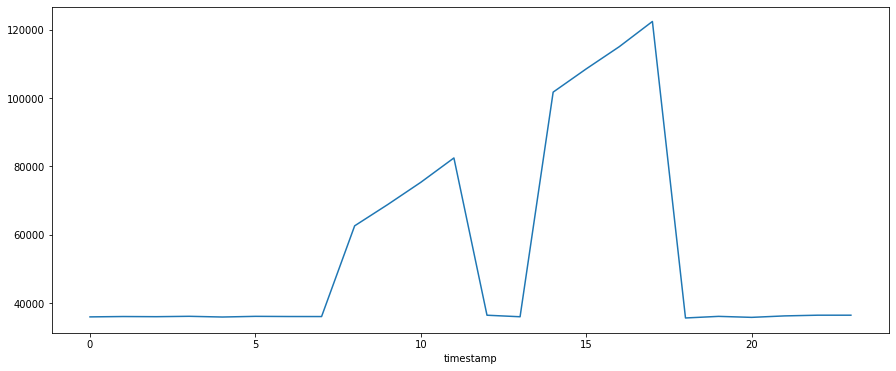

In [9]:
df.cpu.groupby(df.index.hour).sum().plot(figsize=(15,6))

## Aplicando diferenças para identificar Sazonalidade

<AxesSubplot:xlabel='timestamp'>

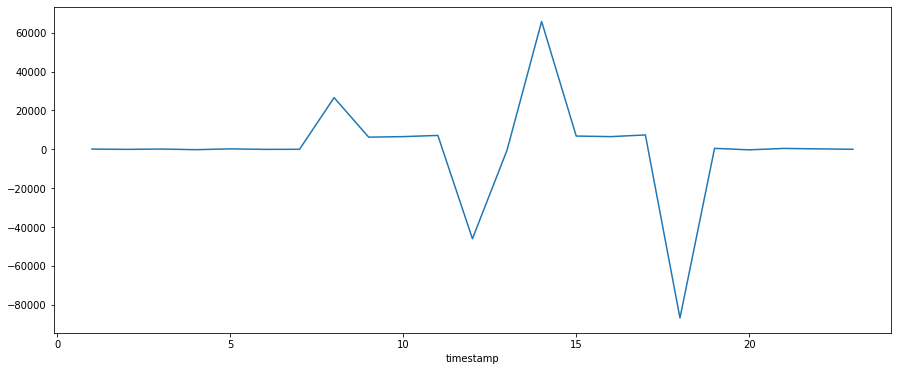

In [10]:
df.cpu.groupby(df.index.hour).sum().diff().plot(figsize=(15,6))

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp,timestamp'>

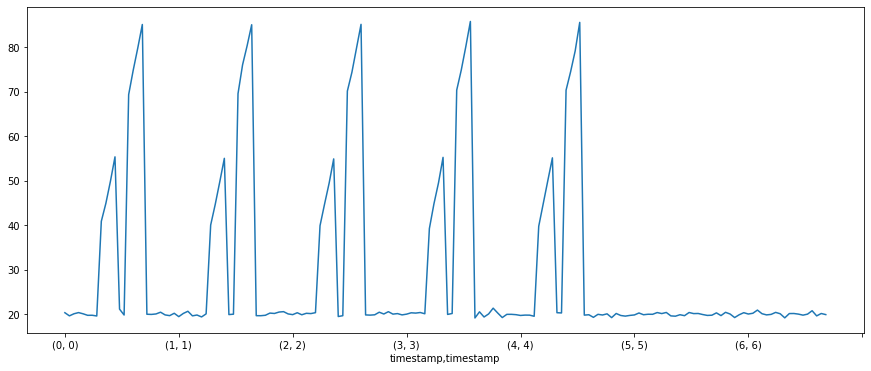

In [11]:
df.cpu.groupby([df.index.dayofweek, df.index.hour]).mean().plot(figsize=(15,6))

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp,timestamp'>

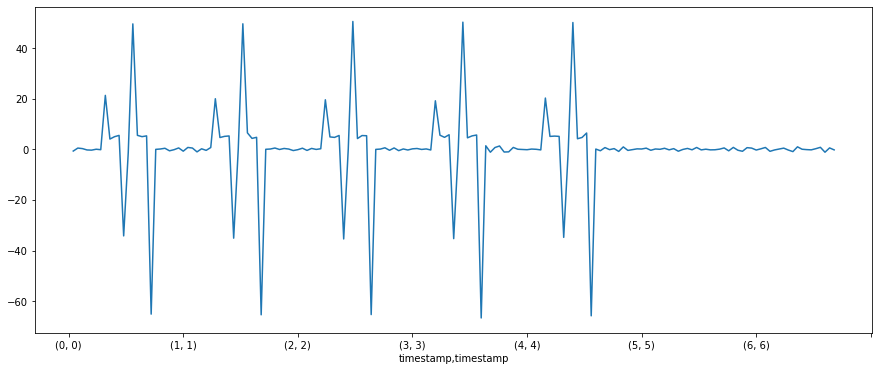

In [12]:
df.cpu.groupby([df.index.dayofweek, df.index.hour]).mean().diff().plot(figsize=(15,6))

## Aplicando Filtros

In [55]:
inicio = pd.Timestamp('2020-01-01 00:00:00')
fim = pd.Timestamp('2020-01-22 23:59:59')
dia_semana = 'Tuesday' # Sunday Monday Tuesday Wednesday Thursday Friday Saturday
hora = 17
minuto = 0
filtro = (df.index >= inicio) & (df.index <= fim) & (df.index.day_name() == dia_semana) & (df.index.hour == hora) & (df.index.minute == minuto)
df[filtro]

,cpu,ram
timestamp,,
2020-01-07 17:00:00,75,68
2020-01-14 17:00:00,93,68
2020-01-21 17:00:00,94,67


<AxesSubplot:xlabel='timestamp'>

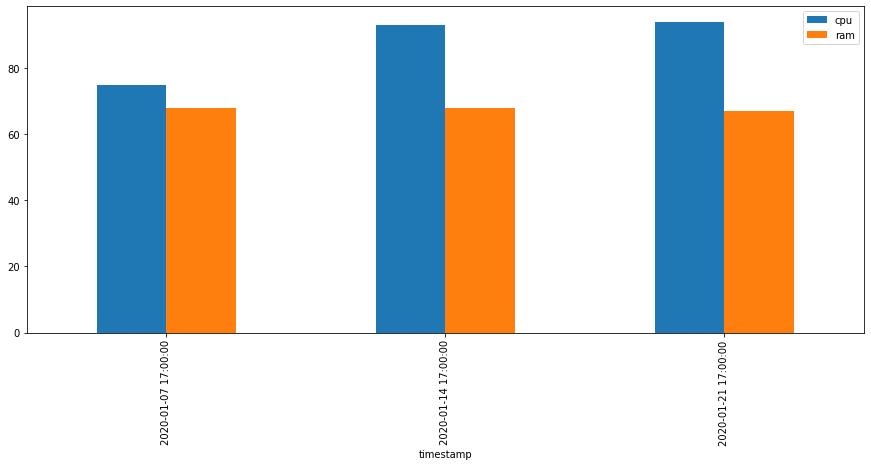

In [57]:
inicio = pd.Timestamp('2020-01-01 00:00:00')
fim = pd.Timestamp('2020-01-22 23:59:59')
dia_semana = 'Tuesday' # Sunday Monday Tuesday Wednesday Thursday Friday Saturday
hora = 17
minuto = 0
filtro = (df.index >= inicio) & (df.index <= fim) & (df.index.day_name() == dia_semana) & (df.index.hour == hora) & (df.index.minute == minuto)
df[filtro].plot(kind='bar', figsize=(15,6))